### IMAGE TO PENCIL SKETCH CONVERSION USING PYTHON

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Import libraries
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
def show_image(img):
    cv2.imshow('Image' , img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
from google.colab.patches import cv2_imshow

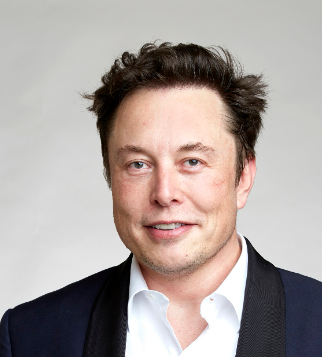

In [ ]:
#Load Image
img = cv2.imread(r'/content/12.png',cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

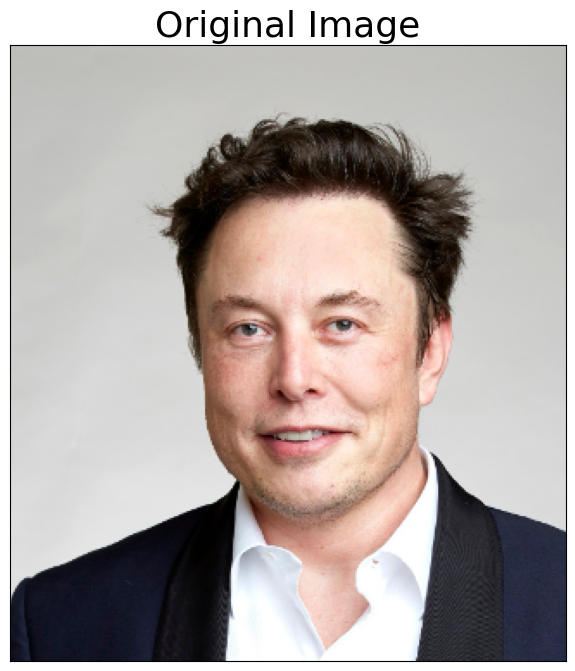

In [ ]:
#Display Image
plt.figure(num = 1, figsize=(8,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [ ]:
def dodgeV2(image, mask):
    return cv2.divide(image, 255-mask, scale=256)

In [ ]:
def blend(front,back):
    result=front*255/(255-back)
    result[result>255]=255
    result[back==255]=255
    return result

In [ ]:
def render(img_rgb):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Applying gaussian blur to grayscale image
    inverted_gray_image = 255 - gray_image

    #Invert the blur image
    blurred_image = cv2.GaussianBlur(inverted_gray_image, (21, 21), 0)
    inverted_blurred_image = 255 - blurred_image

    #Apply the dodgeV2 function
    pencil_sketch_image = cv2.divide(gray_image, inverted_blurred_image, scale = 256.0)

    #Blend the image


    return pencil_sketch_image

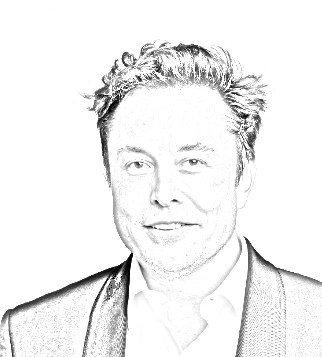

In [ ]:
pencil_sketch_image = render(img)
cv2_imshow(pencil_sketch_image)

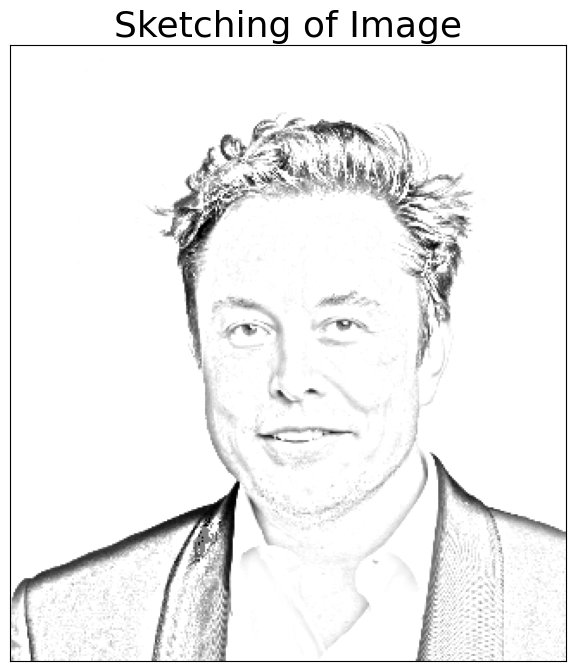

In [ ]:
#Display output
plt.figure(figsize=(8,8))
plt.imshow(pencil_sketch_image, cmap="gray")
plt.title('Sketching of Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [ ]:
cv2.imwrite('output_img.png', (pencil_sketch_image))

True

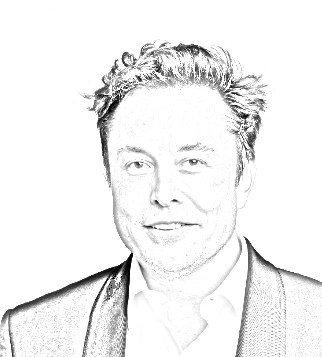

In [ ]:
cv2_imshow(pencil_sketch_image)